In [1]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Function to randomize weights, taken from
# https://stackoverflow.com/questions/64699434/reset-model-parameters-and-weights-of-a-network-pytorch-for-cross-validation
def init_weights(m):
    if isinstance(m, nn.Embedding):
        nn.init.normal_(m.weight, mean=0.0, std=0.1) ## or simply use your layer.reset_parameters()
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, mean=0.0, std=np.sqrt(1 / m.in_features))
        if m.bias is not None: 
            nn.init.zeros_(m.bias)
    if isinstance(m, nn.Conv1d):
        nn.init.normal_(m.weight, mean=0.0, std=np.sqrt(4 / m.in_channels))
        if m.bias is not None: 
            nn.init.zeros_(m.bias)


# Now we start the neural network model

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 32, bias=True),
            nn.Sigmoid(),
            nn.Linear(32, 10, bias=True) 
        )
        
    def forward(self, x):
        x = self.layers(x)
        return x
    
    
network = Net()
network.apply(init_weights)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(network.parameters(), lr=0.001)
    

In [3]:
train_losses = []
test_losses = []
train_correct =[]
test_correct = []


train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                            transform=torchvision.transforms.Compose([
                              torchvision.transforms.ToTensor(),
                              #  torchvision.transforms.Normalize(
                                #  (0.1307,), (0.3081,))
                            ])),
  batch_size=256, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                            transform=torchvision.transforms.Compose([
                              torchvision.transforms.ToTensor(),
                              #  torchvision.transforms.Normalize(
                                #  (0.1307,), (0.3081,))
                            ])),
  batch_size=1000, shuffle=False)
      

D:\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
  # First iteration
  
for epoch in range(40):
    train_corr = 0
    test_corr = 0
    
    for batch_idx, (data,label) in enumerate(train_loader):
        # output = network(torch.reshape(data,[256,-1]))
        output = network(data)
        loss = criterion(output,label)
        predicted = torch.max(output.data, 1)[1]
        train_corr += (predicted == label).sum()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_losses.append([loss.item()])
    train_correct.append([train_corr.item()])
    
    with torch.no_grad():
        for batch_idx, (test_data, test_label) in enumerate(test_loader):
            test_output = network(test_data)
            test_loss = criterion(test_output, test_label)
            test_predicted = torch.max(test_output.data, 1)[1]
            test_corr +=  (test_predicted == test_label).sum()
    
    test_losses.append([test_loss.item()])
    test_correct.append([test_corr.item()])
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tTraining Accuracy: {:.3f}%'.format(
        epoch+1, 
        loss,
        train_corr/60000*100
        ))
    print('Epoch: {} \tTesting Loss: {:.6f}   \tTesting Accuracy: {:.3f}%'.format(
        epoch+1, 
        test_loss,
        test_corr/10000*100
        ))

Epoch: 1 	Training Loss: 0.877021 	Training Accuracy: 72.375%
Epoch: 1 	Testing Loss: 0.730785   	Testing Accuracy: 86.610%
Epoch: 2 	Training Loss: 0.490538 	Training Accuracy: 88.332%
Epoch: 2 	Testing Loss: 0.428927   	Testing Accuracy: 90.130%
Epoch: 3 	Training Loss: 0.318890 	Training Accuracy: 90.533%
Epoch: 3 	Testing Loss: 0.342232   	Testing Accuracy: 91.350%
Epoch: 4 	Training Loss: 0.388663 	Training Accuracy: 91.622%
Epoch: 4 	Testing Loss: 0.297473   	Testing Accuracy: 91.880%
Epoch: 5 	Training Loss: 0.454590 	Training Accuracy: 92.305%
Epoch: 5 	Testing Loss: 0.274418   	Testing Accuracy: 92.560%
Epoch: 6 	Training Loss: 0.397488 	Training Accuracy: 92.853%
Epoch: 6 	Testing Loss: 0.257023   	Testing Accuracy: 93.020%
Epoch: 7 	Training Loss: 0.220798 	Training Accuracy: 93.375%
Epoch: 7 	Testing Loss: 0.244603   	Testing Accuracy: 93.450%
Epoch: 8 	Training Loss: 0.202160 	Training Accuracy: 93.720%
Epoch: 8 	Testing Loss: 0.236493   	Testing Accuracy: 93.620%
Epoch: 9

In [5]:
# Second iteration
network2 = Net()
network2.apply(init_weights)
optimizer2 = optim.Adam(network2.parameters(), lr=0.001)
  
for epoch in range(40):
    train_corr = 0
    test_corr = 0
    
    for batch_idx, (data,label) in enumerate(train_loader):
        output = network2(data)
        loss = criterion(output,label)
        predicted = torch.max(output.data, 1)[1]
        train_corr += (predicted == label).sum()
        
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()

    train_losses[epoch].append(loss.item())
    train_correct[epoch].append(train_corr.item())
    
    with torch.no_grad():
        for batch_idx, (test_data, test_label) in enumerate(test_loader):
            test_output = network2(test_data)
            test_loss = criterion(test_output, test_label)
            test_predicted = torch.max(test_output.data, 1)[1]
            test_corr +=  (test_predicted == test_label).sum()
    
    test_losses[epoch].append(test_loss.item())
    test_correct[epoch].append(test_corr.item())
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tTraining Accuracy: {:.3f}%'.format(
        epoch+1, 
        loss,
        train_corr/60000*100
        ))
    print('Epoch: {} \tTesting Loss: {:.6f}   \tTesting Accuracy: {:.3f}%'.format(
        epoch+1, 
        test_loss,
        test_corr/10000*100
        ))

Epoch: 1 	Training Loss: 0.750723 	Training Accuracy: 70.002%
Epoch: 1 	Testing Loss: 0.759754   	Testing Accuracy: 86.530%
Epoch: 2 	Training Loss: 0.466894 	Training Accuracy: 87.853%
Epoch: 2 	Testing Loss: 0.439219   	Testing Accuracy: 90.070%
Epoch: 3 	Training Loss: 0.368040 	Training Accuracy: 90.230%
Epoch: 3 	Testing Loss: 0.345531   	Testing Accuracy: 91.510%
Epoch: 4 	Training Loss: 0.293828 	Training Accuracy: 91.490%
Epoch: 4 	Testing Loss: 0.301785   	Testing Accuracy: 92.180%
Epoch: 5 	Training Loss: 0.214210 	Training Accuracy: 92.312%
Epoch: 5 	Testing Loss: 0.276377   	Testing Accuracy: 92.820%
Epoch: 6 	Training Loss: 0.245314 	Training Accuracy: 92.910%
Epoch: 6 	Testing Loss: 0.262038   	Testing Accuracy: 93.130%
Epoch: 7 	Training Loss: 0.262020 	Training Accuracy: 93.418%
Epoch: 7 	Testing Loss: 0.245959   	Testing Accuracy: 93.530%
Epoch: 8 	Training Loss: 0.200746 	Training Accuracy: 93.840%
Epoch: 8 	Testing Loss: 0.232404   	Testing Accuracy: 93.800%
Epoch: 9

In [7]:
  # Third iteration
network3 = Net()
network3.apply(init_weights)
optimizer3 = optim.Adam(network3.parameters(), lr=0.001)
  
for epoch in range(40):
    train_corr = 0
    test_corr = 0
    
    for batch_idx, (data,label) in enumerate(train_loader):
        # output = network3(torch.reshape(data,[256,-1]))
        output = network3(data)
        loss = criterion(output,label)
        predicted = torch.max(output.data, 1)[1]
        train_corr += (predicted == label).sum()
        
        optimizer3.zero_grad()
        loss.backward()
        optimizer3.step()

    train_losses[epoch].append(loss.item())
    train_correct[epoch].append(train_corr.item())
    
    with torch.no_grad():
        for batch_idx, (test_data, test_label) in enumerate(test_loader):
            test_output = network3(test_data)
            test_loss = criterion(test_output, test_label)
            test_predicted = torch.max(test_output.data, 1)[1]
            test_corr +=  (test_predicted == test_label).sum()
    
    test_losses[epoch].append(test_loss.item())
    test_correct[epoch].append(test_corr.item())
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tTraining Accuracy: {:.3f}%'.format(
        epoch+1, 
        loss,
        train_corr/60000*100
        ))
    print('Epoch: {} \tTesting Loss: {:.6f}   \tTesting Accuracy: {:.3f}%'.format(
        epoch+1, 
        test_loss,
        test_corr/10000*100
        ))

Epoch: 1 	Training Loss: 0.436089 	Training Accuracy: 81.230%
Epoch: 1 	Testing Loss: 0.406082   	Testing Accuracy: 15.037%
Epoch: 2 	Training Loss: 0.414762 	Training Accuracy: 90.663%
Epoch: 2 	Testing Loss: 0.303298   	Testing Accuracy: 15.308%
Epoch: 3 	Training Loss: 0.264709 	Training Accuracy: 92.015%
Epoch: 3 	Testing Loss: 0.267114   	Testing Accuracy: 15.445%
Epoch: 4 	Training Loss: 0.224576 	Training Accuracy: 92.818%
Epoch: 4 	Testing Loss: 0.248958   	Testing Accuracy: 15.540%
Epoch: 5 	Training Loss: 0.224017 	Training Accuracy: 93.422%
Epoch: 5 	Testing Loss: 0.231230   	Testing Accuracy: 15.608%
Epoch: 6 	Training Loss: 0.132769 	Training Accuracy: 93.888%
Epoch: 6 	Testing Loss: 0.217816   	Testing Accuracy: 15.652%
Epoch: 7 	Training Loss: 0.081627 	Training Accuracy: 94.237%
Epoch: 7 	Testing Loss: 0.207623   	Testing Accuracy: 15.710%
Epoch: 8 	Training Loss: 0.212572 	Training Accuracy: 94.598%
Epoch: 8 	Testing Loss: 0.197572   	Testing Accuracy: 15.723%
Epoch: 9

In [18]:
print('Total results:\n')
for i in range(40):
    print('Epoch: {} \n\
        Train Loss Mean: {:.3f} \t\tTrain Loss SD: {:.3f}\n\
        Test Loss Mean: {:.3f} \t\tTest Loss SD: {:.3f}\n\
        Train Accuracy Mean: {:.3f} \t Train Accuracy SD: {:.3f}\n\
        Test Accuracy Mean: {:.3f} \t Test Accuracy SD: {:.3f}\n'.format(
        i+1,
        np.mean(train_losses[i]), np.std(train_losses[i]),
        np.mean(test_losses[i]), np.std(test_losses[i]),
        np.mean(train_correct[i])/60000, np.std(np.array(train_correct[i])/60000),
        np.mean(test_correct[i])/10000, np.std(np.array(test_correct[i])/10000),
        ))

Total results:

Epoch: 1 
        Train Loss Mean: 0.814 		Train Loss SD: 0.063
        Test Loss Mean: 0.745 		Test Loss SD: 0.014
        Train Accuracy Mean: 0.712 	 Train Accuracy SD: 0.012
        Test Accuracy Mean: 0.866 	 Test Accuracy SD: 0.000

Epoch: 2 
        Train Loss Mean: 0.479 		Train Loss SD: 0.012
        Test Loss Mean: 0.434 		Test Loss SD: 0.005
        Train Accuracy Mean: 0.881 	 Train Accuracy SD: 0.002
        Test Accuracy Mean: 0.901 	 Test Accuracy SD: 0.000

Epoch: 3 
        Train Loss Mean: 0.343 		Train Loss SD: 0.025
        Test Loss Mean: 0.344 		Test Loss SD: 0.002
        Train Accuracy Mean: 0.904 	 Train Accuracy SD: 0.002
        Test Accuracy Mean: 0.914 	 Test Accuracy SD: 0.001

Epoch: 4 
        Train Loss Mean: 0.341 		Train Loss SD: 0.047
        Test Loss Mean: 0.300 		Test Loss SD: 0.002
        Train Accuracy Mean: 0.916 	 Train Accuracy SD: 0.001
        Test Accuracy Mean: 0.920 	 Test Accuracy SD: 0.002

Epoch: 5 
        Train Loss

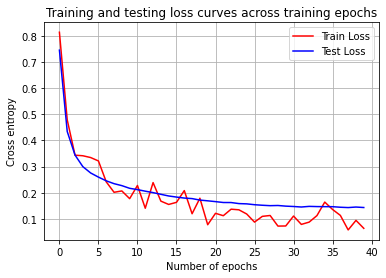

In [15]:
fig = plt.figure()
plt.plot(np.mean(train_losses, axis=1), color='red')
plt.plot(np.mean(test_losses, axis=1), color='blue')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('Number of epochs')
plt.ylabel('Cross entropy')
plt.title('Training and testing loss curves across training epochs')
plt.grid()
plt.show()


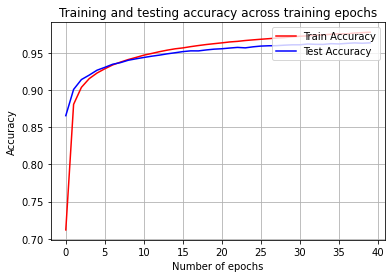

In [16]:
fig = plt.figure()
plt.plot(np.mean(train_correct, axis=1)/60000, color='red')
plt.plot(np.mean(test_correct, axis=1)/10000, color='blue')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper right')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training and testing accuracy across training epochs')
plt.grid()
plt.show()